<a href="https://colab.research.google.com/github/sedaalsan/library-management-system/blob/main/Tahminleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("natural_gas.xlsx")
df.head()

,Consumption,Temperature
0,551547920.0,6.741935
1,551886440.0,5.857143
2,513182950.0,7.225806
3,281495382.0,12.566667
4,138625166.0,17.225806


<Axes: >

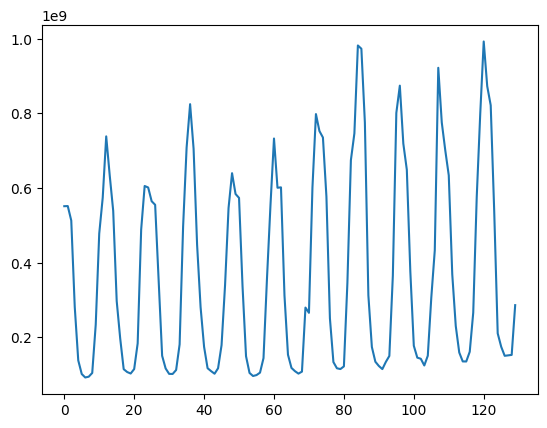

In [ ]:
consumption = df["Consumption"]
consumption.plot()

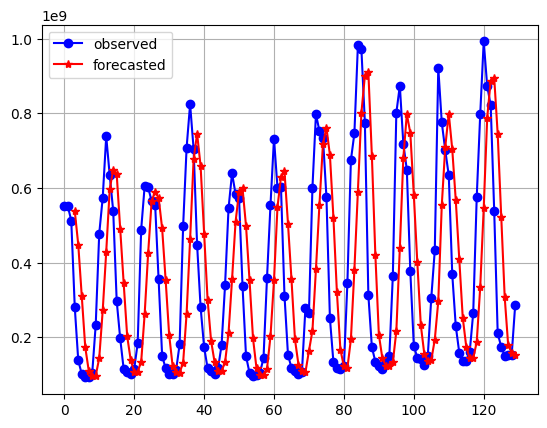

In [ ]:
ypred = consumption.rolling(3).mean().shift(1)

plt.plot(consumption, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

In [ ]:
def mean_absolute_percentage_error(y, ypred):
    return np.mean(np.abs(y - ypred) / np.abs(y)) * 100

53.2891713431308


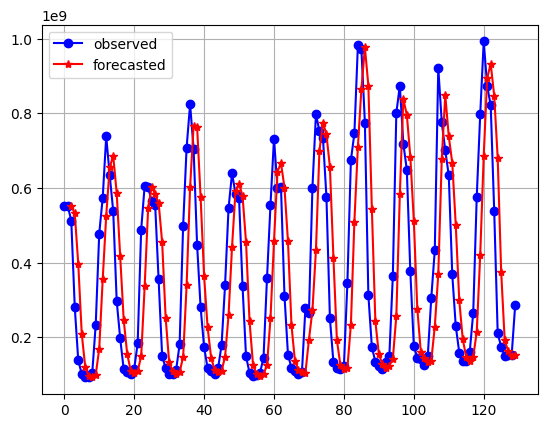

In [ ]:
ypred = consumption.rolling(2).mean().shift(1)

plt.plot(consumption, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(mean_absolute_percentage_error(consumption, ypred))

In [ ]:
best_mape = np.inf

for k in range(2, 16):
    ypred = consumption.rolling(k).mean().shift(1)
    mape = mean_absolute_percentage_error(consumption, ypred)
    if mape < best_mape:
        best_mape = mape
        best_k = k

print(best_k)

2


41.62151885300012


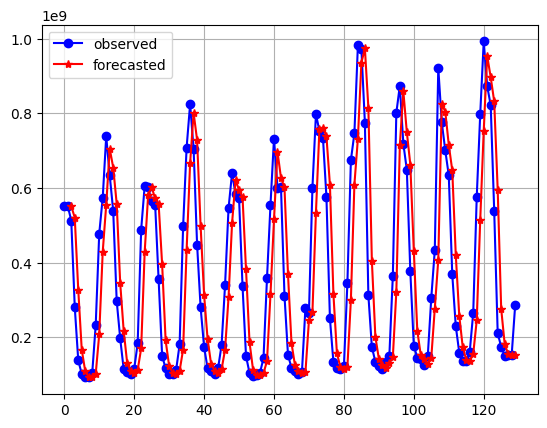

In [ ]:
w = np.array([0.2,0.8])
k = w.size

ypred = consumption.rolling(k).apply(lambda x: np.sum(x * w)).shift(1)

plt.plot(consumption, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(mean_absolute_percentage_error(consumption, ypred))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


33.87000926031391


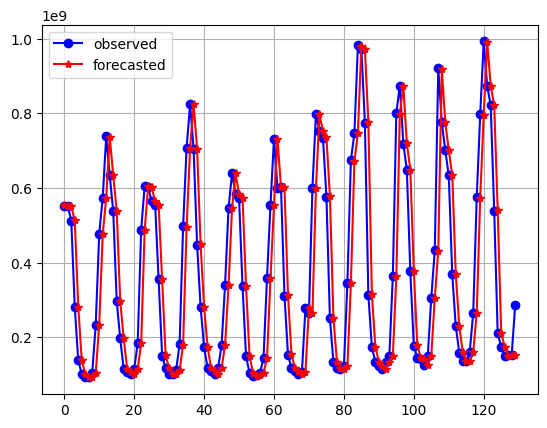

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

mdl = ExponentialSmoothing(consumption).fit()

#mdl.summary()

ypred = mdl.fittedvalues

plt.plot(consumption, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(mean_absolute_percentage_error(consumption, ypred))

In [ ]:
consumption_train = consumption[:-12]
consumption_test = consumption[-12:]
consumption_test

118    5.759782e+08
119    7.980872e+08
120    9.927663e+08
121    8.730799e+08
122    8.218188e+08
123    5.387296e+08
124    2.109218e+08
125    1.750888e+08
126    1.508014e+08
127    1.520602e+08
128    1.532323e+08
129    2.865093e+08
Name: Consumption, dtype: float64

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


57.602331487915805


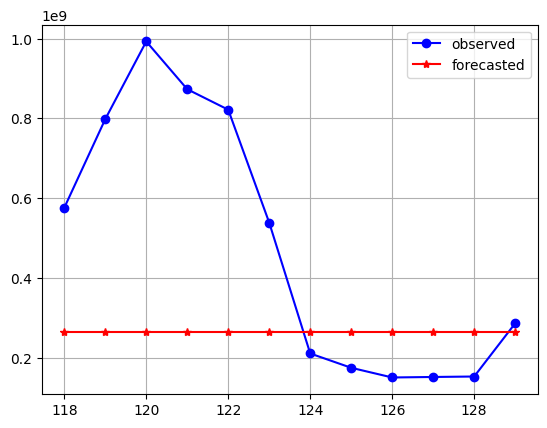

In [ ]:
mdl = ExponentialSmoothing(consumption_train).fit()

ypred = mdl.predict(consumption_test.index[0],consumption_test.index[-1])

plt.plot(consumption_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(mean_absolute_percentage_error(consumption_test, ypred))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


275.9546676425623


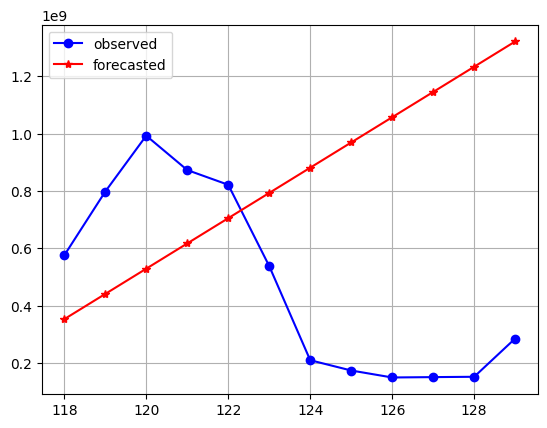

In [ ]:
mdl = ExponentialSmoothing(consumption_train, trend= "add").fit()

ypred = mdl.predict(consumption_test.index[0],consumption_test.index[-1])

plt.plot(consumption_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(mean_absolute_percentage_error(consumption_test, ypred))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


263.7907487670398


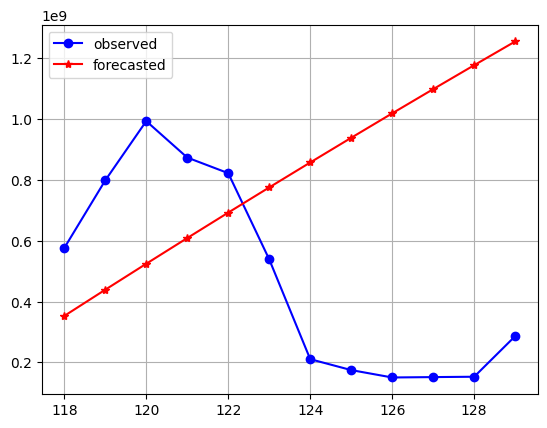

In [ ]:
mdl = ExponentialSmoothing(consumption_train, trend= "add", damped_trend=True).fit()

ypred = mdl.predict(consumption_test.index[0],consumption_test.index[-1])

plt.plot(consumption_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(mean_absolute_percentage_error(consumption_test, ypred))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


12.534866298374098


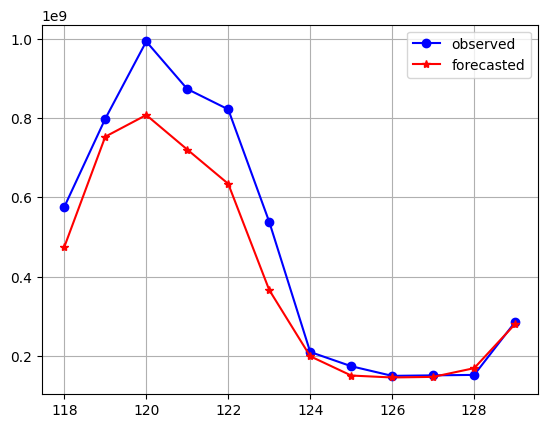

In [ ]:
mdl = ExponentialSmoothing(consumption_train, trend= "add", damped_trend=True,
                           seasonal = "add", seasonal_periods = 12).fit()

ypred = mdl.predict(consumption_test.index[0],consumption_test.index[-1])

plt.plot(consumption_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(mean_absolute_percentage_error(consumption_test, ypred))

In [ ]:
trend = [None, "add", "mul"]
damped = [False, True]
seasonal = [None, "add", "mul"]

best_mape = np.inf

for t in trend:
    for d in damped:
        for s in seasonal:
            if t == None:
                d = False
            mdl = ExponentialSmoothing(consumption_train, trend= t, damped_trend=d,
                           seasonal = s, seasonal_periods = 12).fit()
            ypred = mdl.predict(consumption_test.index[0],consumption_test.index[-1])
            mape = mean_absolute_percentage_error(consumption_test, ypred)
            if mape < best_mape:
                best_mape = mape
                best_params = (t,d,s)

print(best_params)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


('mul', True, 'mul')


6.02188703732587


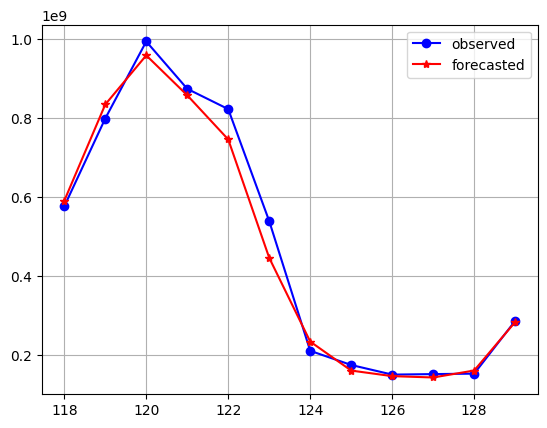

In [ ]:
mdl = ExponentialSmoothing(consumption_train, trend= "mul", damped_trend=True,
                           seasonal = "mul", seasonal_periods = 12).fit()

ypred = mdl.predict(consumption_test.index[0],consumption_test.index[-1])

plt.plot(consumption_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(mean_absolute_percentage_error(consumption_test, ypred))

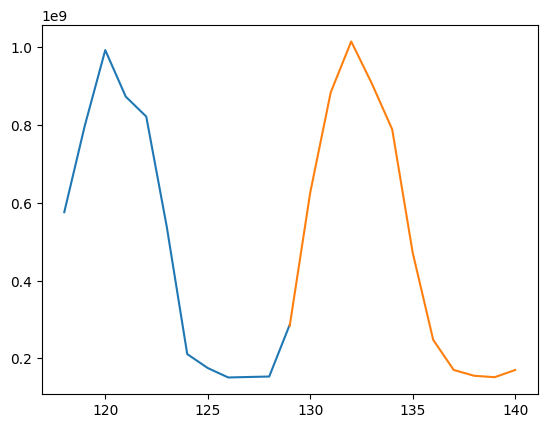

In [ ]:
ypred = mdl.predict(129, 140)
plt.plot(consumption_test)
plt.plot(ypred)

In [ ]:
ypred

129    2.837651e+08
130    6.261446e+08
131    8.838566e+08
132    1.014921e+09
133    9.074549e+08
134    7.888315e+08
135    4.717406e+08
136    2.476680e+08
137    1.701232e+08
138    1.551828e+08
139    1.515213e+08
140    1.700217e+08
dtype: float64

In [ ]:
consumption.diff().diff().plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


29.32582257310997


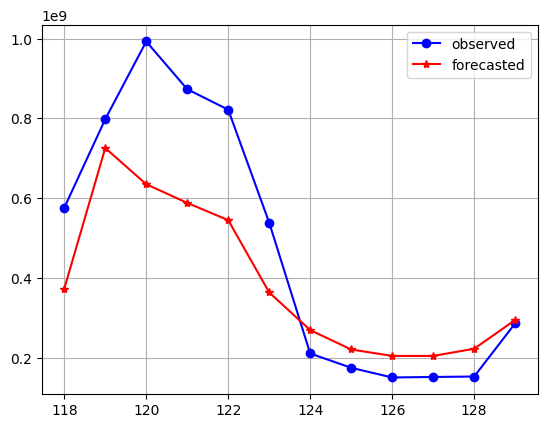

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

mdl = ARIMA(consumption_train, order=(2,1,3), seasonal_order=(1,0,0,12)).fit()

ypred = mdl.predict(consumption_test.index[0],consumption_test.index[-1])

plt.plot(consumption_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(mean_absolute_percentage_error(consumption_test, ypred))

In [ ]:
time_index = pd.date_range("2004-01-01", periods = consumption.size, freq = "MS")
time_index

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01'],
              dtype='datetime64[ns]', length=130, freq='MS')

In [ ]:
df = pd.DataFrame({"ds" : time_index, "y" : consumption})
df.head()

,ds,y
0,2004-01-01,551547920.0
1,2004-02-01,551886440.0
2,2004-03-01,513182950.0
3,2004-04-01,281495382.0
4,2004-05-01,138625166.0


In [ ]:
df_train = df.iloc[:-12,:]
df_test = df.iloc[-12:,:]
df_test

,ds,y
118,2013-11-01,5.759782e+08
119,2013-12-01,7.980872e+08
120,2014-01-01,9.927663e+08
121,2014-02-01,8.730799e+08
122,2014-03-01,8.218188e+08
123,2014-04-01,5.387296e+08
124,2014-05-01,2.109218e+08
125,2014-06-01,1.750888e+08
126,2014-07-01,1.508014e+08
127,2014-08-01,1.520602e+08


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp9uya5bd/ee2twcan.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp9uya5bd/hh7je5jb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=304', 'data', 'file=/tmp/tmpp9uya5bd/ee2twcan.json', 'init=/tmp/tmpp9uya5bd/hh7je5jb.json', 'output', 'file=/tmp/tmpp9uya5bd/prophet_modelm70ze00d/prophet_model-20240509090340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:03:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:03:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


16.386981582452893


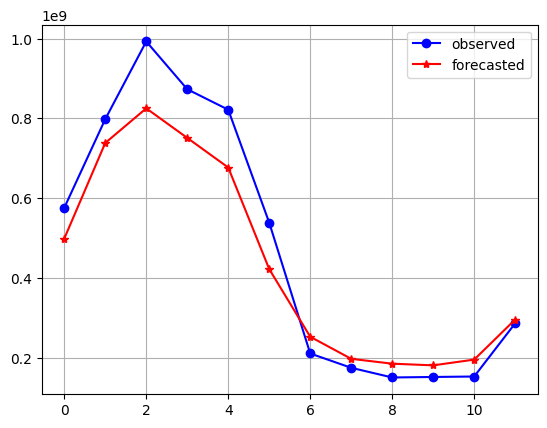

In [ ]:
from prophet import Prophet

mdl = Prophet()
mdl.fit(df_train)

future_df = mdl.make_future_dataframe(periods = 12, freq = "MS", include_history=False)

ypred_df = mdl.predict(future_df)
ypred = ypred_df.yhat.values
y_test = df_test.y.values

plt.plot(y_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(mean_absolute_percentage_error(y_test, ypred))

In [ ]:
pd.date_range("2004-01-01", periods = 12, freq = "ys")

DatetimeIndex(['2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp9uya5bd/84uoij6p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp9uya5bd/2xckh7z_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83672', 'data', 'file=/tmp/tmpp9uya5bd/84uoij6p.json', 'init=/tmp/tmpp9uya5bd/2xckh7z_.json', 'output', 'file=/tmp/tmpp9uya5bd/prophet_model4rcqh4fo/prophet_model-20240509090315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:03:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:03:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


16.363289122048986


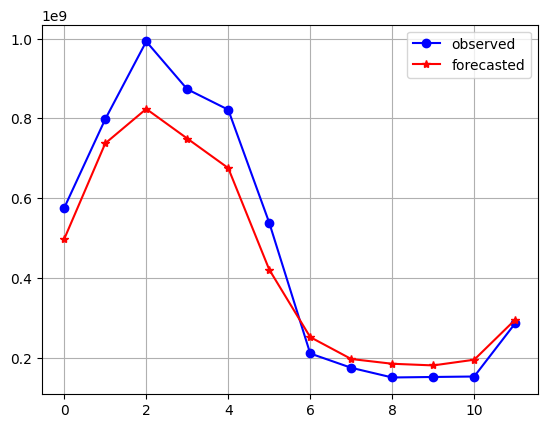

In [ ]:
special_day = pd.DataFrame(
    {
        "holiday" : "Yılbaşı",
        "ds" : pd.date_range("2004-01-01", periods = 12, freq = "ys"),
        "lower_window" : -2,
        "upper_window" : 1
    }
)

mdl = Prophet(holidays= special_day)
mdl.fit(df_train)



future_df = mdl.make_future_dataframe(periods = 12, freq = "MS", include_history=False)

ypred_df = mdl.predict(future_df)
ypred = ypred_df.yhat.values
y_test = df_test.y.values

plt.plot(y_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(mean_absolute_percentage_error(y_test, ypred))

In [ ]:
df_gas = pd.read_excel("natural_gas.xlsx")

df = pd.DataFrame({"ds" : time_index, "y" : consumption, "temp" : df_gas.Temperature})
df["ID"] = np.random.choice([0,1], size = len(df))
df.head()


,ds,y,temp,ID
0,2004-01-01,551547920.0,6.741935,1
1,2004-02-01,551886440.0,5.857143,0
2,2004-03-01,513182950.0,7.225806,1
3,2004-04-01,281495382.0,12.566667,0
4,2004-05-01,138625166.0,17.225806,1


In [ ]:
def prophet_forecast(df):
    df_train = df.iloc[:-12,:]
    df_test = df.iloc[-12:,:]
    df_test

    special_day = pd.DataFrame(
        {
            "holiday" : "Yılbaşı",
            "ds" : pd.date_range("2004-01-01", periods = 12, freq = "ys"),
            "lower_window" : -2,
            "upper_window" : 1
        }
    )

    mdl = Prophet(holidays= special_day)
    mdl.add_regressor("temp")
    mdl.fit(df_train)



    future_df = mdl.make_future_dataframe(periods = 12, freq = "MS", include_history=False)
    future_df["temp"] = df_test["temp"].values
    ypred_df = mdl.predict(future_df)
    ypred = ypred_df.yhat.values
    y_test = df_test.y.values

    return {"ypred": ypred, "y_test" : y_test}

results = df.groupby("ID")[["ds","y","temp"]].apply(prophet_forecast)

In [ ]:
df_gas = pd.read_excel("natural_gas.xlsx")


mu = df_gas.iloc[:-12,:].mean()
sigma = df_gas.iloc[:-12,:].std()

df_gas = (df_gas - mu) / sigma

In [ ]:
def make_data(data, lag = 3):
    X = []
    y = []
    for i in range(len(data) - lag):
        X.append(data[i : i + lag])
        y.append(data[i + lag])

    return np.array(X), np.array(y)

X, y = make_data(df_gas["Consumption"].values, lag = 12)
print(X.shape)
print(y.shape)

(118, 12)
(118,)


In [ ]:
X_train = X[:-12]
y_train = y[:-12]

X_test = X[-12:]
y_test = y[-12:]

0.9110952073854152


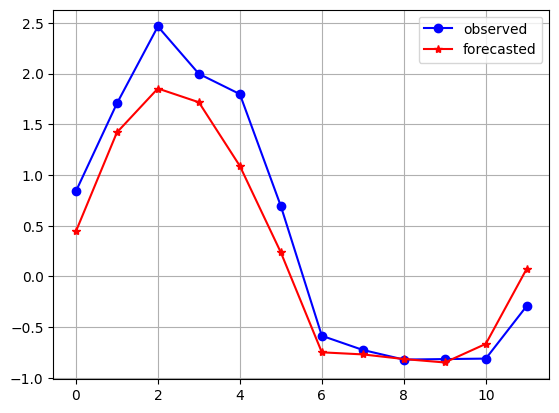

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

mdl = GradientBoostingRegressor()

mdl.fit(X_train, y_train)
ypred = mdl.predict(X_test)


plt.plot(y_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(r2_score(y_test, ypred))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
def make_data(data, lag = 3):
    X = []
    y = []
    for i in range(len(data) - lag):
        X.append(data[i : i + lag])
        y.append(data[i + lag])

    return np.array(X), np.array(y)

X, y = make_data(df_gas["Consumption"].values, lag = 12)
X = X[..., np.newaxis]
print(X.shape)
print(y.shape)

(118, 12, 1)
(118,)


In [ ]:
X_train = X[:-12]
y_train = y[:-12]

X_test = X[-12:]
y_test = y[-12:]

1/1 [==============================] - 0s 443ms/step
0.9168008199161329


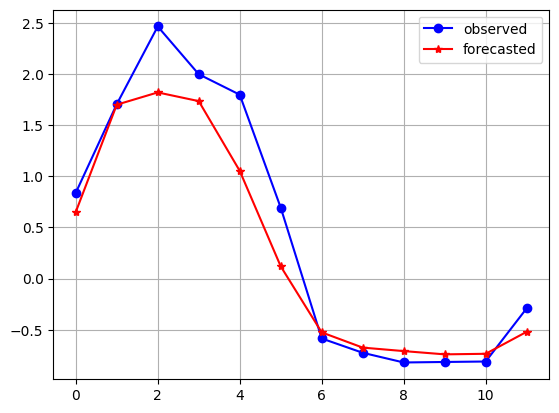

In [ ]:
mdl = keras.Sequential()

mdl.add(layers.LSTM(128, input_shape = X_train.shape[1:] ))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(1, activation = "linear"))

mdl.compile(optimizer = "adam", loss = "mse", metrics = ["mape"])
mdl.fit(X_train, y_train, epochs = 100, verbose = 0)

ypred = mdl.predict(X_test)


plt.plot(y_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(r2_score(y_test, ypred))


In [ ]:
def make_data(data, lag = 3, target_col = 0):
    X = []
    y = []
    for i in range(len(data) - lag):
        X.append(data[i : i + lag].ravel())
        y.append(data[i + lag, target_col])

    return np.array(X), np.array(y)

X, y = make_data(df_gas.values, lag = 12, target_col = 0)
print(X.shape)
print(y.shape)

(118, 24)
(118,)


0.9189189280668631


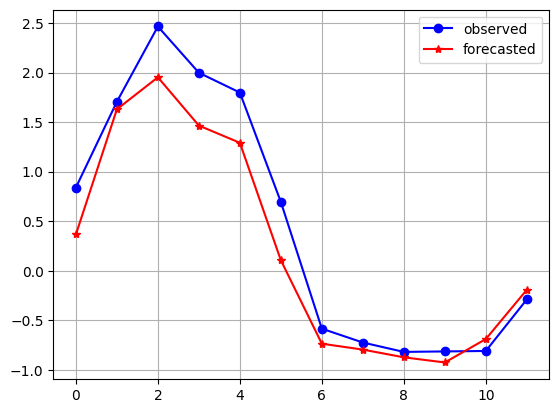

In [ ]:
X_train = X[:-12]
y_train = y[:-12]

X_test = X[-12:]
y_test = y[-12:]

mdl = GradientBoostingRegressor(learning_rate=0.5)

mdl.fit(X_train, y_train)
ypred = mdl.predict(X_test)


plt.plot(y_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(r2_score(y_test, ypred))

In [ ]:
def make_data(data, lag = 3, target_col = 0):
    X = []
    y = []
    for i in range(len(data) - lag):
        X.append(data[i : i + lag])
        y.append(data[i + lag, target_col])

    return np.array(X), np.array(y)

X, y = make_data(df_gas.values, lag = 12, target_col = 0)
print(X.shape)
print(y.shape)

(118, 12, 2)
(118,)


1/1 [==============================] - 1s 713ms/step
0.9530107378596746


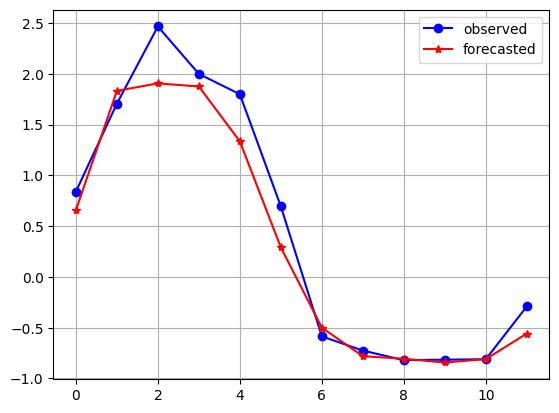

In [ ]:
X_train = X[:-12]
y_train = y[:-12]

X_test = X[-12:]
y_test = y[-12:]


mdl = keras.Sequential()

mdl.add(layers.LSTM(128, input_shape = X_train.shape[1:] ))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(1, activation = "linear"))

mdl.compile(optimizer = "adam", loss = "mse", metrics = ["mape"])
mdl.fit(X_train, y_train, epochs = 100, verbose = 0)

ypred = mdl.predict(X_test)


plt.plot(y_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(r2_score(y_test, ypred))

In [ ]:
def make_data(data, lag = 3, target_col = 0, period = 2):
    X = []
    y = []
    for i in range(len(data) - lag - period + 1):
        X.append(data[i : i + lag].ravel())
        y.append(data[i + lag : i + lag + period, target_col])

    return np.array(X), np.array(y)

X, y = make_data(df_gas.values, lag = 12, target_col = 0, period = 12)
print(X.shape)
print(y.shape)

(107, 24)
(107, 12)


0.8736008016662613


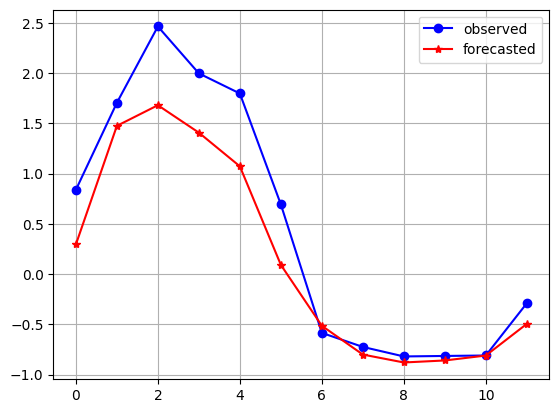

In [ ]:
X_train = X[:-1]
y_train = y[:-1]

X_test = X[-1:]
y_test = y[-1:]

from sklearn.multioutput import MultiOutputRegressor

mdl = MultiOutputRegressor(GradientBoostingRegressor())

mdl.fit(X_train, y_train)

ypred = mdl.predict(X_test)

ypred = ypred.ravel()
y_test = y_test.ravel()

plt.plot(y_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(r2_score(y_test, ypred))

In [ ]:
def make_data(data, lag = 3, target_col = 0, period = 2):
    X = []
    y = []
    for i in range(len(data) - lag - period + 1):
        X.append(data[i : i + lag])
        y.append(data[i + lag : i + lag + period, target_col])

    return np.array(X), np.array(y)

X, y = make_data(df_gas.values, lag = 12, target_col = 0, period = 12)
print(X.shape)
print(y.shape)

(107, 12, 2)
(107, 12)


1/1 [==============================] - 1s 568ms/step
0.9426360940534985


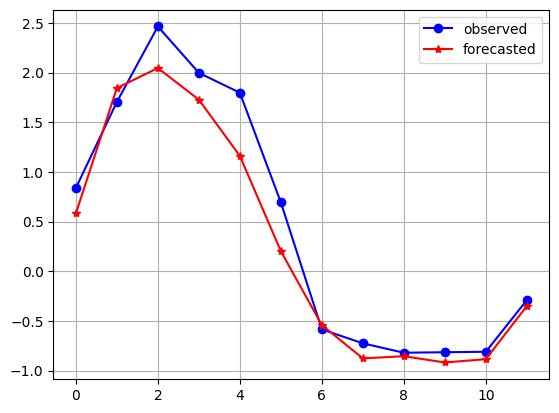

In [ ]:
X_train = X[:-1]
y_train = y[:-1]

X_test = X[-1:]
y_test = y[-1:]


mdl = keras.Sequential()

mdl.add(layers.LSTM(128, input_shape = X_train.shape[1:] ))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(12, activation = "linear"))

mdl.compile(optimizer = "adam", loss = "mse", metrics = ["mape"])
mdl.fit(X_train, y_train, epochs = 100, verbose = 0)

ypred = mdl.predict(X_test)

ypred = ypred.ravel()
y_test = y_test.ravel()

plt.plot(y_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(r2_score(y_test, ypred))

In [ ]:
df_gas = pd.read_excel("natural_gas.xlsx")

df_gas["year"] = time_index.year
df_gas["month"] = time_index.month.astype("str")
df_gas = pd.get_dummies(df_gas, drop_first=True)

mu = df_gas.iloc[:-12,:].mean()
sigma = df_gas.iloc[:-12,:].std()

df_gas = (df_gas - mu) / sigma
df_gas.head()

,Consumption,Temperature,year,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,0.743564,-1.237245,-1.553427,-0.302998,-0.286128,-0.286128,-0.302998,-0.302998,-0.302998,-0.302998,-0.302998,-0.302998,-0.302998,-0.302998
1,0.744885,-1.359303,-1.553427,-0.302998,-0.286128,-0.286128,3.272381,-0.302998,-0.302998,-0.302998,-0.302998,-0.302998,-0.302998,-0.302998
2,0.593894,-1.170495,-1.553427,-0.302998,-0.286128,-0.286128,-0.302998,3.272381,-0.302998,-0.302998,-0.302998,-0.302998,-0.302998,-0.302998
3,-0.309972,-0.433719,-1.553427,-0.302998,-0.286128,-0.286128,-0.302998,-0.302998,3.272381,-0.302998,-0.302998,-0.302998,-0.302998,-0.302998
4,-0.867340,0.209014,-1.553427,-0.302998,-0.286128,-0.286128,-0.302998,-0.302998,-0.302998,3.272381,-0.302998,-0.302998,-0.302998,-0.302998


(107, 168)
(107, 12)
0.8810662895802915


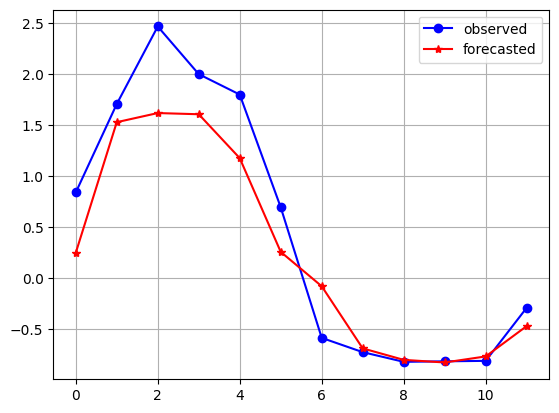

In [ ]:
def make_data(data, lag = 3, target_col = 0, period = 2):
    X = []
    y = []
    for i in range(len(data) - lag - period + 1):
        X.append(data[i : i + lag].ravel())
        y.append(data[i + lag : i + lag + period, target_col])

    return np.array(X), np.array(y)

X, y = make_data(df_gas.values, lag = 12, target_col = 0, period = 12)
print(X.shape)
print(y.shape)

X_train = X[:-1]
y_train = y[:-1]

X_test = X[-1:]
y_test = y[-1:]

from sklearn.multioutput import MultiOutputRegressor

mdl = MultiOutputRegressor(GradientBoostingRegressor())

mdl.fit(X_train, y_train)

ypred = mdl.predict(X_test)

ypred = ypred.ravel()
y_test = y_test.ravel()

plt.plot(y_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(r2_score(y_test, ypred))

(107, 12, 14)
(107, 12)
1/1 [==============================] - 0s 472ms/step
0.9654724520184635


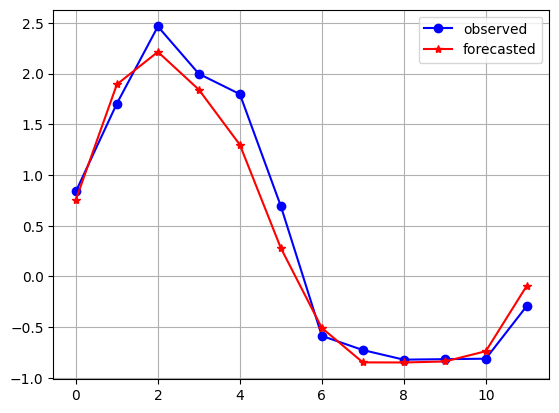

In [ ]:
def make_data(data, lag = 3, target_col = 0, period = 2):
    X = []
    y = []
    for i in range(len(data) - lag - period + 1):
        X.append(data[i : i + lag])
        y.append(data[i + lag : i + lag + period, target_col])

    return np.array(X), np.array(y)

X, y = make_data(df_gas.values, lag = 12, target_col = 0, period = 12)
print(X.shape)
print(y.shape)

X_train = X[:-1]
y_train = y[:-1]

X_test = X[-1:]
y_test = y[-1:]


mdl = keras.Sequential()

mdl.add(layers.LSTM(128, input_shape = X_train.shape[1:] ))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(12, activation = "linear"))

mdl.compile(optimizer = "adam", loss = "mse", metrics = ["mape"])
mdl.fit(X_train, y_train, epochs = 30, verbose = 0)

ypred = mdl.predict(X_test)

ypred = ypred.ravel()
y_test = y_test.ravel()

plt.plot(y_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

print(r2_score(y_test, ypred))

<Axes: >

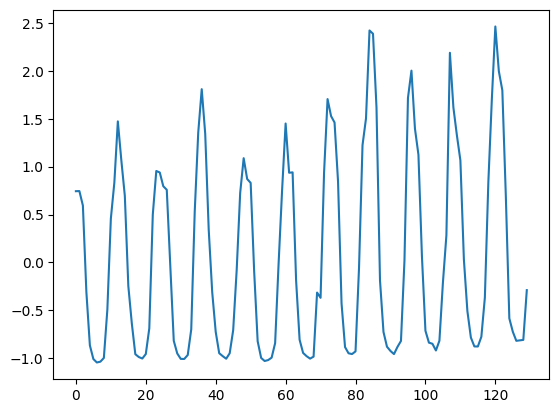

In [ ]:
consumption = df_gas["Consumption"]
consumption.plot()

<Axes: >

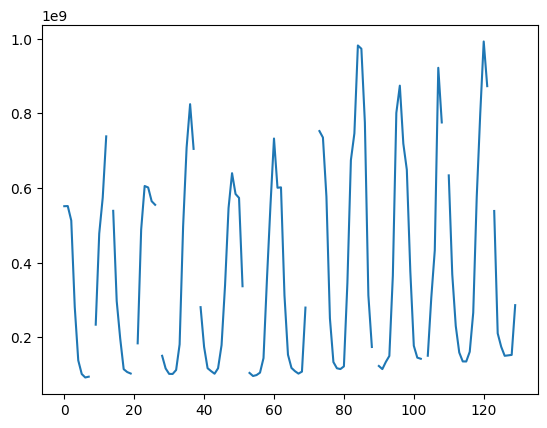

In [ ]:
np.random.seed(0)
df_gas = pd.read_excel("natural_gas.xlsx")
consumption = df_gas["Consumption"]
ix = np.random.choice([False, True], size = consumption.shape, p = [0.9, 0.1])
consumption[ix] = np.nan
consumption.plot()

<Axes: >

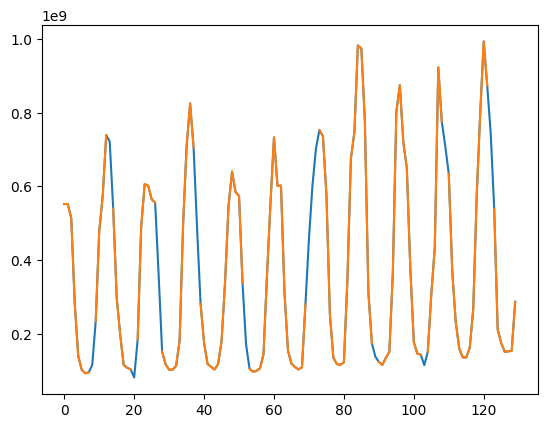

In [ ]:
consumption_interpolated = consumption.interpolate(method= "polynomial", order = 2)

consumption_interpolated.plot()
consumption.plot()